In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv(
    "hourly_cleaned_energy.csv",
    index_col=0,
    parse_dates=True
)

df.head()


,Energy_kWh,Energy_Scaled
Timestamp,,
2023-01-01 00:00:00,11.48,0.297095
2023-01-01 01:00:00,17.92,0.475242
2023-01-01 02:00:00,26.27,0.706224
2023-01-01 03:00:00,12.16,0.315906
2023-01-01 04:00:00,15.61,0.411342


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-01-01 00:00:00 to 2024-01-01 23:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kWh     8784 non-null   float64
 1   Energy_Scaled  8784 non-null   float64
dtypes: float64(2)
memory usage: 205.9 KB


,Energy_kWh,Energy_Scaled
count,8784.000000,8784.000000
mean,13.072770,0.341155
std,4.865389,0.134589
min,0.740000,0.000000
25%,9.650000,0.246473
50%,12.710000,0.331120
75%,16.220000,0.428216
max,36.890000,1.000000


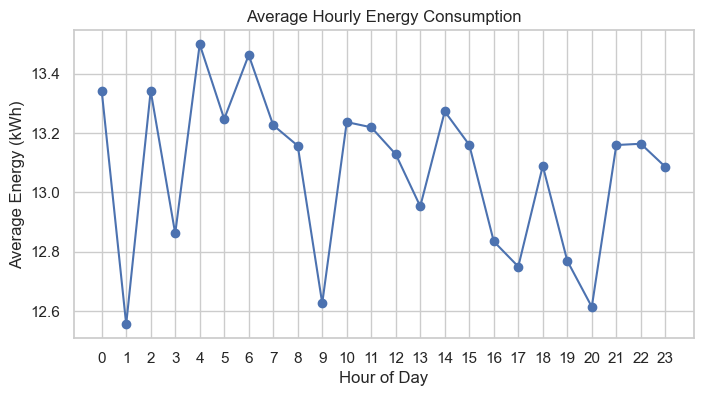

In [5]:
hourly_avg = df.groupby(df.index.hour)['Energy_kWh'].mean()

plt.figure(figsize=(8,4))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title("Average Hourly Energy Consumption")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (kWh)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


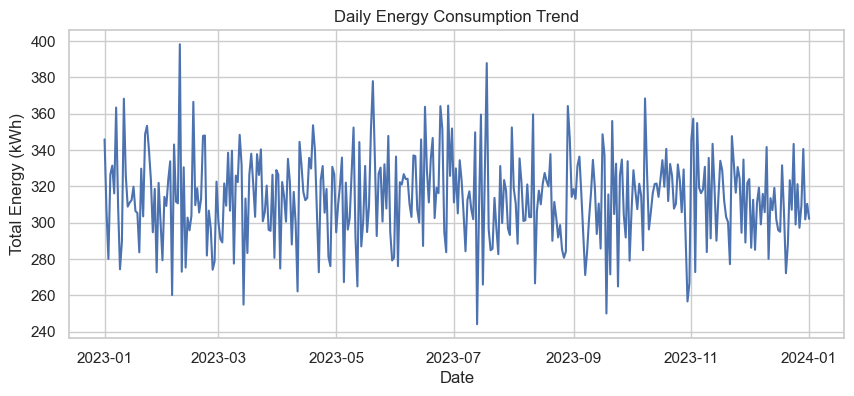

In [6]:
daily_energy = df['Energy_kWh'].resample('D').sum()

plt.figure(figsize=(10,4))
plt.plot(daily_energy)
plt.title("Daily Energy Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Total Energy (kWh)")
plt.show()


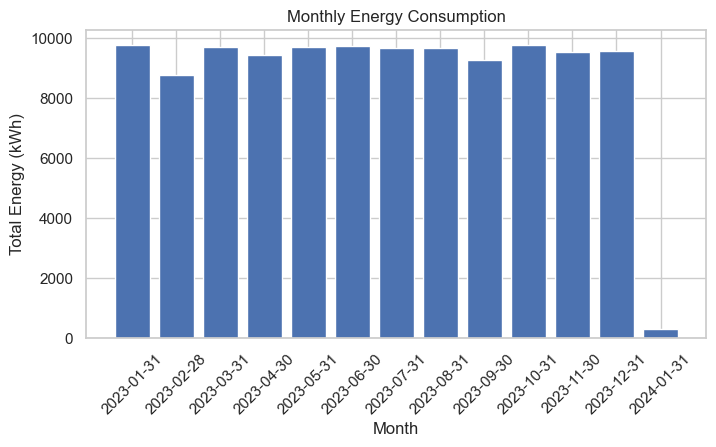

In [8]:
monthly_energy = df['Energy_kWh'].resample('ME').sum()

plt.figure(figsize=(8,4))
plt.bar(monthly_energy.index.astype(str), monthly_energy.values)
plt.title("Monthly Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Total Energy (kWh)")
plt.xticks(rotation=45)
plt.show()


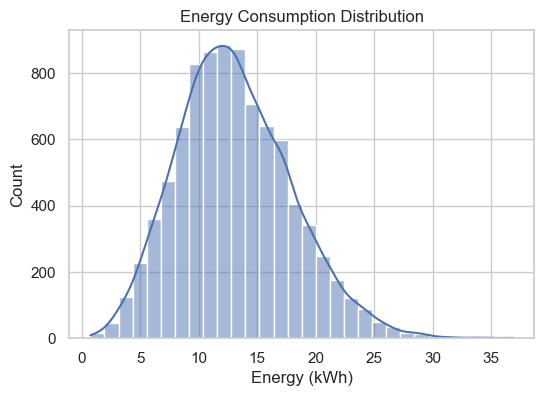

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Energy_kWh'], bins=30, kde=True)
plt.title("Energy Consumption Distribution")
plt.xlabel("Energy (kWh)")
plt.show()


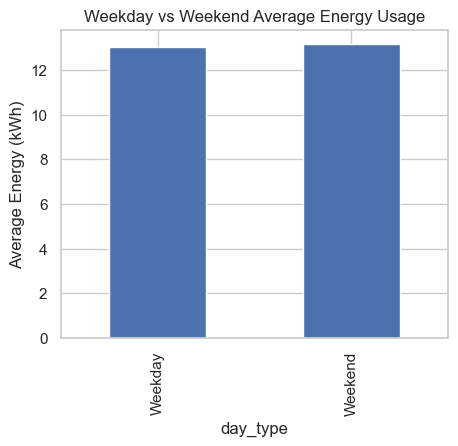

In [10]:
df['day_type'] = np.where(df.index.dayofweek < 5, 'Weekday', 'Weekend')

weekday_weekend = df.groupby('day_type')['Energy_kWh'].mean()

weekday_weekend.plot(
    kind='bar',
    figsize=(5,4),
    title="Weekday vs Weekend Average Energy Usage"
)
plt.ylabel("Average Energy (kWh)")
plt.show()


In [11]:
peak_threshold = df['Energy_kWh'].quantile(0.9)

peak_hours = df[df['Energy_kWh'] > peak_threshold]

peak_hours.head()


,Energy_kWh,Energy_Scaled,day_type
Timestamp,,,
2023-01-01 02:00:00,26.27,0.706224,Weekend
2023-01-01 07:00:00,23.57,0.631535,Weekend
2023-01-01 09:00:00,19.79,0.526971,Weekend
2023-01-01 10:00:00,20.47,0.545781,Weekend
2023-01-01 17:00:00,20.73,0.552974,Weekend


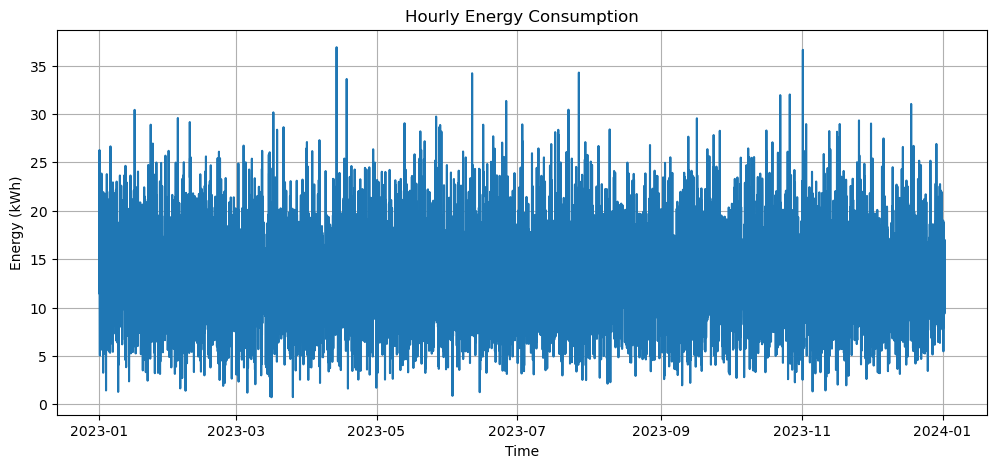

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df[energy_col])
plt.title("Hourly Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.show()


In [12]:
def energy_recommendation(avg_hour):
    if avg_hour >= 18 and avg_hour <= 22:
        return "High consumption period – shift heavy appliance usage to off-peak hours."
    elif avg_hour >= 6 and avg_hour < 10:
        return "Moderate usage – optimize appliance scheduling."
    else:
        return "Low consumption – ideal time for energy-intensive tasks."

recommendations = pd.DataFrame({
    "Hour": hourly_avg.index,
    "Avg_Energy": hourly_avg.values,
    "Recommendation": [energy_recommendation(h) for h in hourly_avg.index]
})

recommendations.head()


,Hour,Avg_Energy,Recommendation
0,0,13.342541,Low consumption – ideal time for energy-intens...
1,1,12.555000,Low consumption – ideal time for energy-intens...
2,2,13.341612,Low consumption – ideal time for energy-intens...
3,3,12.860902,Low consumption – ideal time for energy-intens...
4,4,13.498798,Low consumption – ideal time for energy-intens...


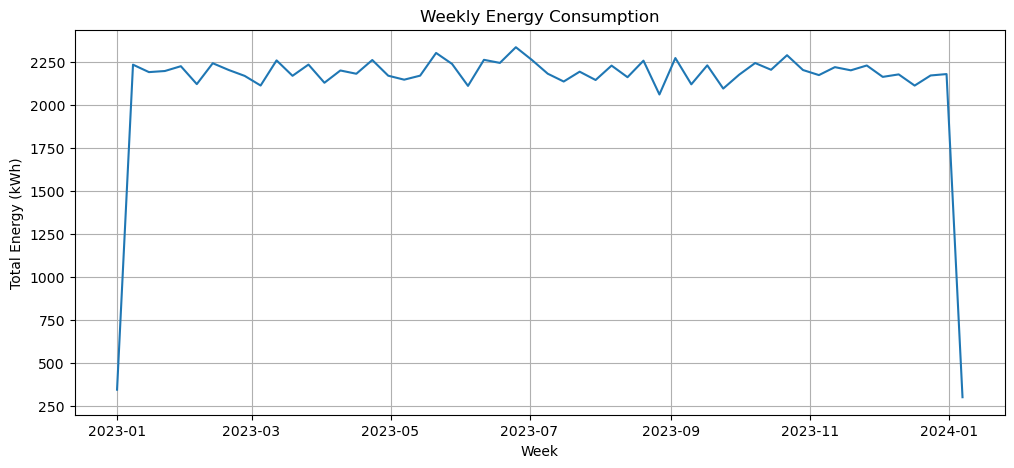

In [18]:
weekly_energy = df[energy_col].resample("W").sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_energy.index, weekly_energy.values)
plt.title("Weekly Energy Consumption")
plt.xlabel("Week")
plt.ylabel("Total Energy (kWh)")
plt.grid(True)
plt.show()


In [13]:
recommendations.sort_values(by="Avg_Energy", ascending=False).head(5)


,Hour,Avg_Energy,Recommendation
4,4,13.498798,Low consumption – ideal time for energy-intens...
6,6,13.462432,Moderate usage – optimize appliance scheduling.
0,0,13.342541,Low consumption – ideal time for energy-intens...
2,2,13.341612,Low consumption – ideal time for energy-intens...
14,14,13.272322,Low consumption – ideal time for energy-intens...


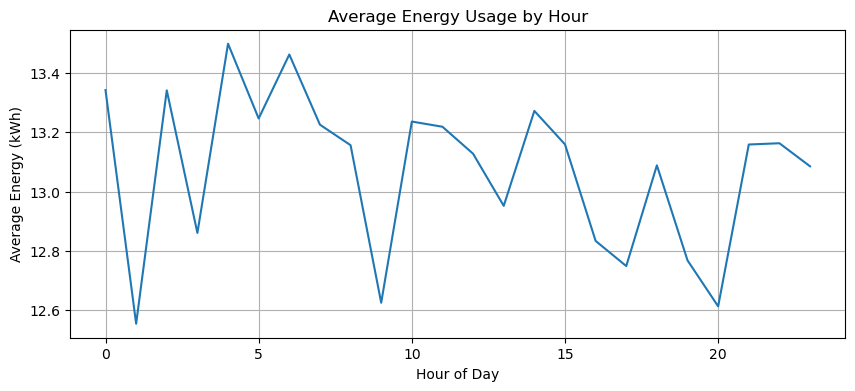

In [20]:
df["hour"] = df.index.hour
hourly_avg = df.groupby("hour")[energy_col].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_avg.index, hourly_avg.values)
plt.title("Average Energy Usage by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (kWh)")
plt.grid(True)
plt.show()


In [25]:
### Dashboard Insights:
- Peak energy usage occurs during evening hours.
- Weekday energy consumption is higher than weekends.
- Certain hours contribute disproportionately to total energy usage.
- Shifting appliance usage to off-peak hours can reduce energy load.
- Analytics results can guide energy-saving recommendations.
